# Credit Risk Models: Default Probabilities

In [14]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.stats import t
import matplotlib.pyplot as plt

In [15]:
n=30
simulation=250_000
Lambda=0.1

# for Gaussian copula
Gx=np.random.randn(n,simulation)  

# for t copula
v=4
Tx=np.random.randn(n,simulation)
Ty=np.random.chisquare(v)
tcopula=Tx/np.sqrt(Ty/v)

In [16]:
Corr1=np.full((n,n),0)
for i in range(n):
    Corr1[i,i]=1
cho1=np.linalg.cholesky(Corr1)  

Corr2=np.full((n,n),0.2)
for i in range(n):
    Corr2[i,i]=1
cho2=np.linalg.cholesky(Corr2)  

Corr3=np.full((n,n),0.4)
for i in range(n):
    Corr3[i,i]=1
cho3=np.linalg.cholesky(Corr3)  

# default time tau
choX1=cho1@Gx  
U1=pd.DataFrame(norm.cdf(choX1))
tau1=-1/Lambda*np.log(U1)

choX2=cho2@Gx  
U2=pd.DataFrame(norm.cdf(choX2))
tau2=-1/Lambda*np.log(U2)

choX3=cho3@Gx  
U3=pd.DataFrame(norm.cdf(choX3))
tau3=-1/Lambda*np.log(U3)


choT1=pd.DataFrame(cho1@tcopula)  
U4=pd.DataFrame(t.cdf(choT1,v))
tau4=-1/Lambda*np.log(U4)

choT2=pd.DataFrame(cho2@tcopula)  
U5=pd.DataFrame(t.cdf(choT2,v))
tau5=-1/Lambda*np.log(U5)

choT3=pd.DataFrame(cho3@tcopula)  
U6=pd.DataFrame(t.cdf(choT3,v))
tau6=-1/Lambda*np.log(U6)

In [17]:
def GaussianPD1(rho,D,year,tau):
    subtotal=[]
    for i in range(simulation):
        a=0
        for j in range(n):
            if tau.iloc[j,i]<=year:
                a+=1
        subtotal.append(a)

    b=0
    for i in range(len(subtotal)):
        if subtotal[i]>=D:
            b+=1
    dp=b/simulation
    return dp  

In [18]:
def GaussianPD2(rho,D,year,tau):
    subtotal=[]
    for i in range(simulation):
        a=0
        for j in range(n):
            if tau.iloc[j,i]>year:
                a+=1
        subtotal.append(a)

    b=0
    for i in range(len(subtotal)):
        if subtotal[i]==n:
            b+=1
    dp=b/simulation
    return dp

In [19]:
column1=[GaussianPD1(0,9,1,tau1),GaussianPD1(0,11,1,tau1),GaussianPD1(0,14,1,tau1),
        GaussianPD2(0,0,1.5,tau1),GaussianPD2(0,0,2.5,tau1),GaussianPD2(0,0,3.5,tau1)]
column2=[GaussianPD1(0.2,9,1,tau2),GaussianPD1(0.2,11,1,tau2),GaussianPD1(0.2,14,1,tau2),
        GaussianPD2(0.2,0,1.5,tau2),GaussianPD2(0.2,0,2.5,tau2),GaussianPD2(0.2,0,3.5,tau2)]
column3=[GaussianPD1(0.4,9,1,tau3),GaussianPD1(0.4,11,1,tau3),GaussianPD1(0.4,14,1,tau3),
        GaussianPD2(0.4,0,1.5,tau3),GaussianPD2(0.4,0,2.5,tau3),GaussianPD2(0.4,0,3.5,tau3)]

In [20]:
def TPD1(rho,D,year,tau):
    subtotal=[]
    for i in range(simulation):
        a=0
        for j in range(n):
            if tau.iloc[j,i]<=year:
                a+=1
        subtotal.append(a)

    b=0
    for i in range(len(subtotal)):
        if subtotal[i]>=D:
            b+=1
    dp=b/simulation
    return dp    

In [21]:
def TPD2(rho,D,year,tau):
    subtotal=[]
    for i in range(simulation):
        a=0
        for j in range(n):
            if tau.iloc[j,i]>year:
                a+=1
        subtotal.append(a)

    b=0
    for i in range(len(subtotal)):
        if subtotal[i]==n:
            b+=1
    dp=b/simulation
    return dp

In [22]:
column4=[TPD1(0,9,1,tau4),TPD1(0,11,1,tau4),TPD1(0,14,1,tau4),
        TPD2(0,0,1.5,tau4),TPD2(0,0,2.5,tau4),TPD2(0,0,3.5,tau4)]
column5=[TPD1(0.2,9,1,tau5),TPD1(0.2,11,1,tau5),TPD1(0.2,14,1,tau5),
        TPD2(0.2,0,1.5,tau5),TPD2(0.2,0,2.5,tau5),TPD2(0.2,0,3.5,tau5)]
column6=[TPD1(0.4,9,1,tau6),TPD1(0.4,11,1,tau6),TPD1(0.4,14,1,tau6),
        TPD2(0.4,0,1.5,tau6),TPD2(0.4,0,2.5,tau6),TPD2(0.4,0,3.5,tau6)]

In [23]:
index=['P(D>=9,tau<=1y)','P(D>=11,tau<=1y)','P(D>=14,tau<=1y)',
      'P(D=0,tau>1.5y)','P(D=0,tau>2.5y)','P(D=0,tau>3.5y)']
columns=['G rho=0%','G rho=20%','G rho=40%','T rho=0%','T rho=20%','T rho=40%']

DP=pd.DataFrame(index=index, columns=columns)
pd.options.display.float_format = '{:.2%}'.format

In [24]:
for i in range(6):
    DP.iloc[i,0]=column1[i]
    DP.iloc[i,1]=column2[i]
    DP.iloc[i,2]=column3[i]
    DP.iloc[i,3]=column4[i]
    DP.iloc[i,4]=column5[i]
    DP.iloc[i,5]=column6[i]

In [25]:
print(DP)
print('Chi-square variable:',round(Ty,2))

                 G rho=0% G rho=20% G rho=40% T rho=0% T rho=20% T rho=40%
P(D>=9,tau<=1y)     0.14%     5.36%     9.31%    3.18%    15.05%    18.87%
P(D>=11,tau<=1y)    0.00%     2.51%     6.16%    0.36%     8.37%    13.43%
P(D>=14,tau<=1y)    0.00%     0.70%     3.18%    0.00%     3.18%     7.93%
P(D=0,tau>1.5y)     1.10%    11.41%    25.21%    0.10%     4.84%    14.86%
P(D=0,tau>2.5y)     0.05%     4.03%    13.37%    0.00%     1.70%     8.02%
P(D=0,tau>3.5y)     0.00%     1.54%     7.62%    0.00%     0.76%     5.04%
Chi-square variable: 1.69


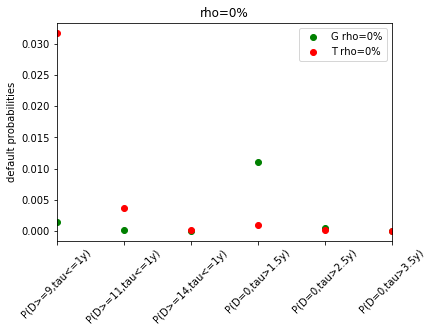

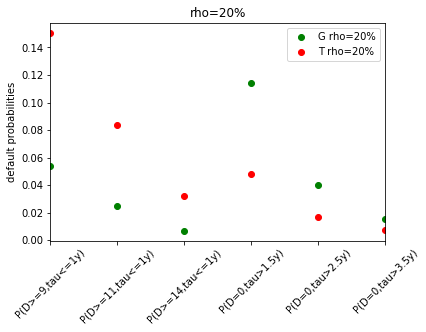

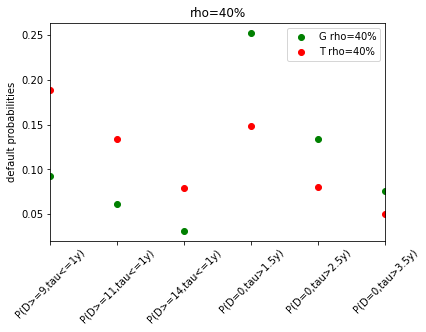

In [26]:
DP[['G rho=0%','T rho=0%']].plot(style=['go','ro'])
plt.ylabel('default probabilities')
plt.title('rho=0%')
plt.xticks(rotation=45)
plt.show()

DP[['G rho=20%','T rho=20%']].plot(style=['go','ro'])
plt.ylabel('default probabilities')
plt.title('rho=20%')
plt.xticks(rotation=45)
plt.show()

DP[['G rho=40%','T rho=40%']].plot(style=['go','ro'])
plt.ylabel('default probabilities')
plt.title('rho=40%')
plt.xticks(rotation=45)
plt.show()